In [1]:
from new_examples.testgraph import Ein, Eout, Rin, Vtree, Ftree, Stree
from graph.graphutils import draw_graph_graphical_props, flat_graph_formulation, Node, VAR, COMP, all_variables, all_components, all_varnodes, sources, default_nodetyperepr
from graph.mergegraph import split_graph, merged_graph, merge_graph, get_edges, subgraph_ins
from graph.nestedgraph import build_typedgraph
import matplotlib

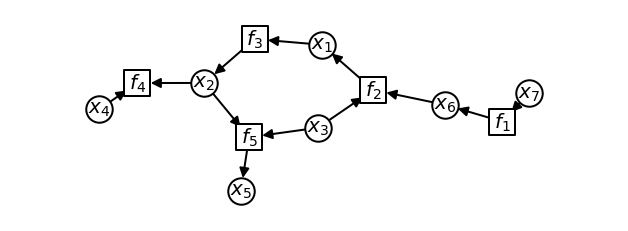

In [2]:
G = flat_graph_formulation(Ein, Eout, Rin)
draw_graph_graphical_props(G, prog='sfdp', figsize=(11,4))

In [3]:
cmap = matplotlib.cm.get_cmap('Pastel1')
def plot_subgraph(G, subgraph):
    colormap_subgraph = {
        matplotlib.colors.rgb2hex(cmap(0.2)): all_variables(*subgraph),
        matplotlib.colors.rgb2hex(cmap(0.3)): all_components(subgraph[0])
    }
    draw_graph_graphical_props(G, colormap_subgraph, prog='sfdp', figsize=(11,4))

# Merge

In [4]:
typed_mergelts = {Node(3,COMP), Node(5, COMP)}
typed_mergelts = {Node(2,COMP),Node(3,COMP),Node(4,COMP)}
#typed_mergelts = {Node(1,COMP), Node(2,COMP), Node(3, COMP), Node(4,COMP)}

## Split graph

In [5]:
subgraph, mgraph = split_graph(G, typed_mergelts)

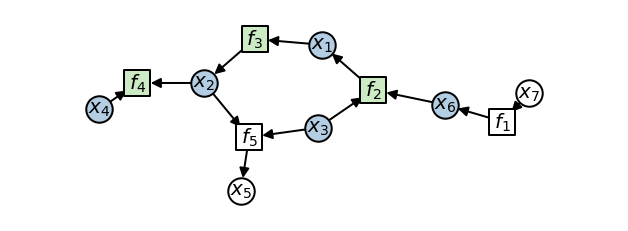

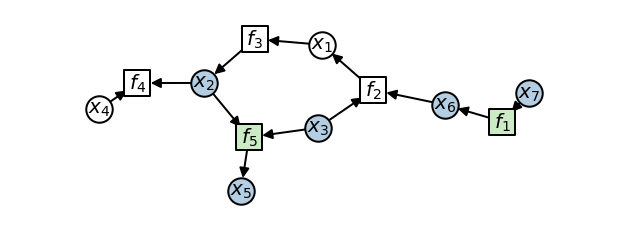

In [6]:
plot_subgraph(G, subgraph)
plot_subgraph(G, mgraph)

## Generate mergegraph

In [7]:
typed_solve_vars = {Node(3, VAR)}
merged_graph(subgraph, mgraph, 1, typed_solve_vars)

[(x_7, f_1),
 (x_2, f_5),
 (x_3, f_5),
 (f_1, x_6),
 (f_5, x_5),
 (x_6, s_1),
 (s_1, x_2),
 (s_1, x_3)]

## Mergegraph and subgraph

In [8]:
typed_mergelts = {Node(2,COMP),Node(3,COMP),Node(4,COMP)}
subgraph, mgraph = split_graph(G, typed_mergelts)

In [9]:
sources(*subgraph)-all_varnodes(mgraph[1]) #mgraph[1] corresponds to output variables

{x_3, x_4}

In [10]:
G_merge, G_sub = merge_graph(G, typed_mergelts, typed_solve_vars, solver_idx=1, exclude_unique_sources=False)

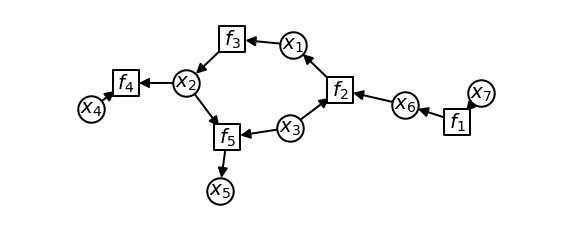

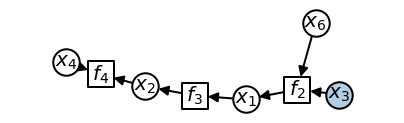

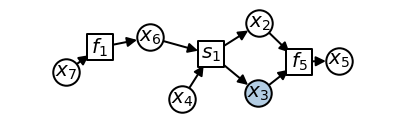

In [11]:
colormap_subgraph = {
        matplotlib.colors.rgb2hex(cmap(0.2)): typed_solve_vars,
        #matplotlib.colors.rgb2hex(cmap(0.3)): all_components(subgraph[0])
    }
draw_graph_graphical_props(G, prog='sfdp', figsize=(10,4))
draw_graph_graphical_props(G_sub, colormap_subgraph, prog='sfdp', figsize=(7,2))
draw_graph_graphical_props(G_merge, colormap_subgraph, prog='sfdp', figsize=(7,2))

# Inputs at root level

In [12]:
Ein = {1: (1,), 2: (1,2,3)}
Eout = {1: (3,), 2: (4,)}
Rin = dict()

In [13]:
G = flat_graph_formulation(Ein, Eout, Rin)

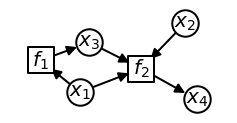

In [14]:
draw_graph_graphical_props(G, {}, prog='sfdp', figsize=(4,2))

In [15]:
typed_mergelts = {Node(2,COMP)}
typed_solve_vars = set()

In [16]:
subgraph, mgraph = split_graph(G, typed_mergelts)

In [17]:
mgraph

({f_1: {x_1}}, {f_1: {x_3}})

In [18]:
subgraph

({f_2: {x_1, x_2, x_3}}, {f_2: {x_4}})

In [19]:
sources(*subgraph)

{x_1, x_2, x_3}

In [20]:
subgraph_ins(subgraph, mgraph)

{x_1, x_3}

In [21]:
mgraph

({f_1: {x_1}}, {f_1: {x_3}})

In [22]:
G_merge, G_sub = merge_graph(G, typed_mergelts, typed_solve_vars, solver_idx=1)

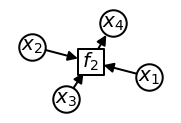

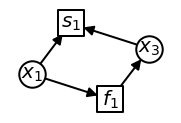

In [23]:
colormap_subgraph = {
        matplotlib.colors.rgb2hex(cmap(0.2)): typed_solve_vars,
        #matplotlib.colors.rgb2hex(cmap(0.3)): all_components(subgraph[0])
    }
draw_graph_graphical_props(G_sub, colormap_subgraph, prog='sfdp', figsize=(3,2))
draw_graph_graphical_props(G_merge, colormap_subgraph, prog='sfdp', figsize=(3,2))

# Graph from tree

In [38]:
from graph.nestedgraph import typed_solver_children, level_order_tree, SOLVER, COMP, VAR
from new_examples.testgraph import Ein, Eout, Rin, Vtree, Ftree, Stree

In [41]:
graphs = build_typedgraph((Ein, Eout, Rin), (Ftree, Stree, Vtree))

TypeError: build_typedgraph() missing 1 required positional argument: 'nodetyperepr'

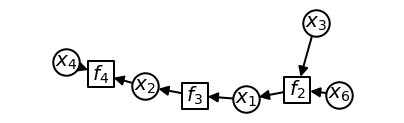

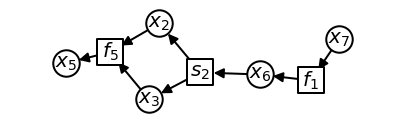

In [40]:
for key,graph in graphs.items():
    draw_graph_graphical_props(graph, {}, prog='sfdp', figsize=(7,2))

In [ ]:
from graph.graphutils import dfs_tree, nested_sources

Stree = {
    5: 3,
    2: 1,
    3: 2,
    4: 2,
    6: 1
}

dfs_tree(Stree, 1)

{1, 2, 3, 4, 5, 6}